In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import os
import numpy as np
import pandas as pd
import scipy.io
from scipy import stats
import scipy.spatial.distance as sp_distance

import nibabel as nib
import nilearn.plotting as plotting
from nilearn.input_data import NiftiMasker

import matplotlib.pyplot as plt
import seaborn as sns 

# %matplotlib notebook
%matplotlib inline
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})

/gpfs/ysm/project/rj299/conda_envs/py37_dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Autosaving every 5 seconds


In [2]:
base_root = '/home/rj299/project/mdm_analysis/'
data_root = '/home/rj299/project/mdm_analysis/output/imaging/Sink_rsa/1stLevel/'
out_root = '/home/rj299/project/mdm_analysis/output/'

## Load anatomical and ROIs

In [3]:
anat_mean = nib.load(os.path.join(out_root, 'imaging', 'all_sub_average.nii.gz'))

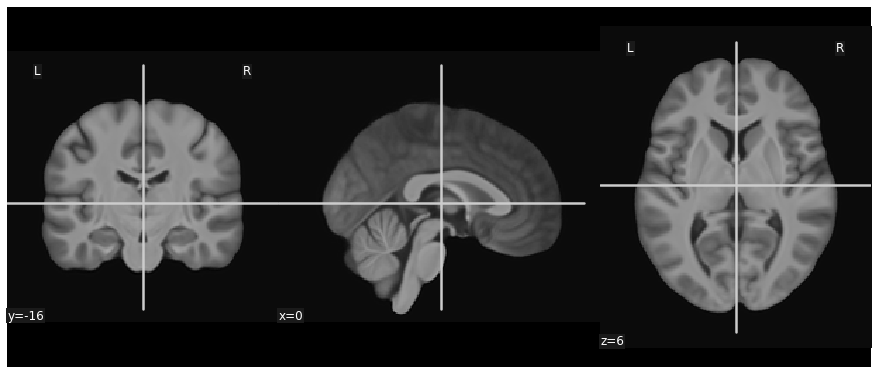

In [4]:
fig = plt.figure(figsize = (12,5))
plotting.plot_anat(anat_mean, black_bg = True, figure = fig)

In [17]:
maskfile_vmpfc = os.path.join(out_root, 'imaging', 'binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz')
mask_vmpfc = nib.load(maskfile_vmpfc)
maskfile_striatum = os.path.join(out_root, 'imaging', 'binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz')
mask_striatum = nib.load(maskfile_striatum)

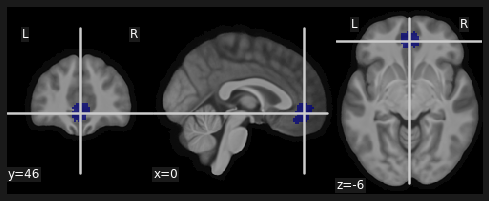

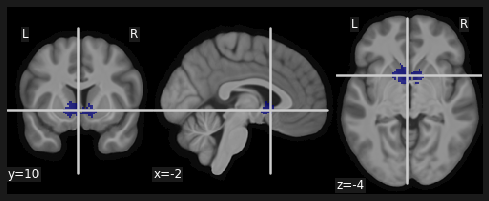

In [18]:
plotting.plot_roi(mask_vmpfc, bg_img = anat_mean)
plotting.plot_roi(mask_striatum, bg_img = anat_mean)

## Load GLM outputs

In [10]:
cont1 = nib.load(os.path.join(data_root, '_subject_id_2588', 'con_0001.nii'))
spmt1 = nib.load(os.path.join(data_root, '_subject_id_2588', 'spmT_0001.nii'))

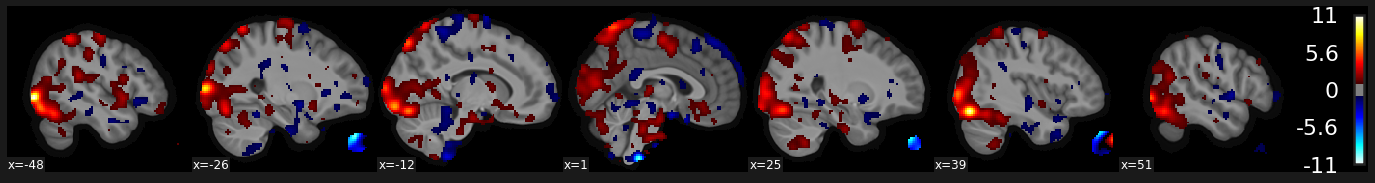

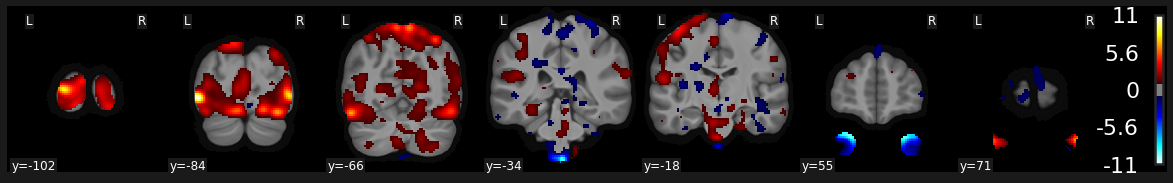

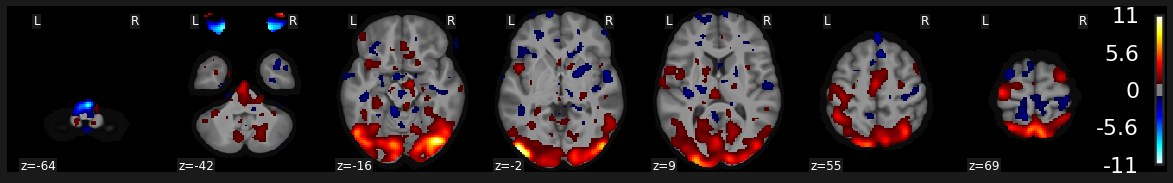

In [12]:
thr = 1
plotting.plot_stat_map(cont1, threshold = thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(cont1, threshold = thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(cont1, threshold = thr, bg_img = anat_mean, display_mode = 'z')

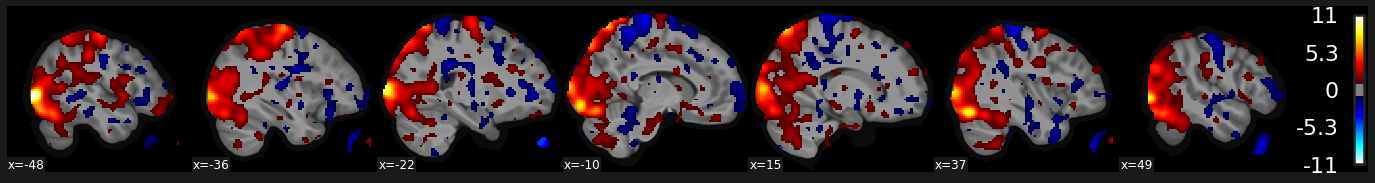

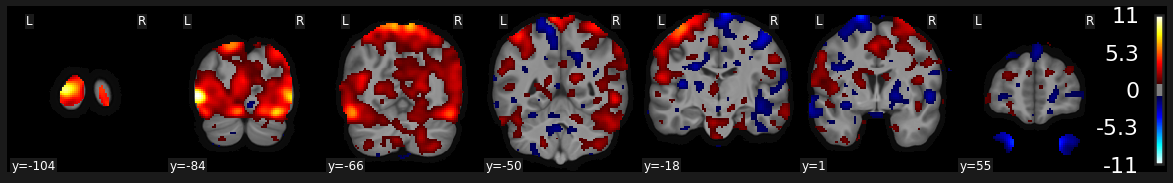

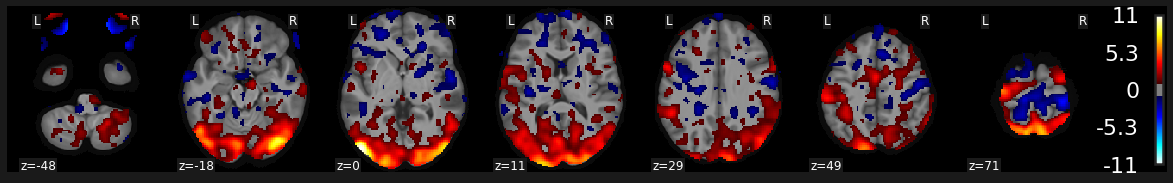

In [14]:
thr = 1
plotting.plot_stat_map(spmt1, threshold = thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(spmt1, threshold = thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(spmt1, threshold = thr, bg_img = anat_mean, display_mode = 'z')

extract stats from roi

In [22]:
masker_striatum = NiftiMasker(mask_img=mask_striatum)
# spmt1_striatum = masker_striatum.fit_transform(spmt1)
masker_vmpfc = NiftiMasker(mask_img=mask_vmpfc)
# spmt1_vmpfc = masker_vmpfc.fit_transform(spmt1)

In [21]:
spmt1_striatum.shape

(1, 500)

In [24]:
spmt1_vmpfc.shape

(1, 449)

In [26]:
list(range(1,17))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [45]:
# 
stims = {'01': 'Med_amb_0', '02': 'Med_amb_1', '03': 'Med_amb_2', '04': 'Med_amb_3',
         '05': 'Med_risk_0', '06': 'Med_risk_1', '07': 'Med_risk_2', '08': 'Med_risk_3', 
         '09': 'Mon_amb_0', '10': 'Mon_amb_1', '11': 'Mon_amb_2', '12': 'Mon_amb_3',
         '13': 'Mon_risk_0', '14': 'Mon_risk_1', '15': 'Mon_risk_2', '16': 'Mon_risk_3'}


stim_num = len(stims)

spmt_allstims_vmpfc= np.zeros((stim_num, 449))
spmt_allstims_striatum= np.zeros((stim_num, 500))


for (stim_idx, stim) in enumerate(list(stims.keys())):
    spmt = nib.load(os.path.join(data_root, '_subject_id_2588', 'spmT_00%s.nii' %stim))
    spmt_vmpfc = masker_vmpfc.fit_transform(spmt)
    spmt_striatum = masker_striatum.fit_transform(spmt)
    
    spmt_allstims_vmpfc[stim_idx, :] = spmt_vmpfc
    spmt_allstims_striatum[stim_idx, :] = spmt_striatum

In [54]:
# create rdm
rdm_vmpfc = 1 - np.corrcoef(spmt_allstims_vmpfc)
rsm_vmpfc = np.corrcoef(spmt_allstims_vmpfc)
rdm_striatum = 1 - np.corrcoef(spmt_allstims_striatum)
rsm_striatum = np.corrcoef(spmt_allstims_striatum)

In [87]:
list(stims.values())

['Med_amb_0',
 'Med_amb_1',
 'Med_amb_2',
 'Med_amb_3',
 'Med_risk_0',
 'Med_risk_1',
 'Med_risk_2',
 'Med_risk_3',
 'Mon_amb_0',
 'Mon_amb_1',
 'Mon_amb_2',
 'Mon_amb_3',
 'Mon_risk_0',
 'Mon_risk_1',
 'Mon_risk_2',
 'Mon_risk_3']

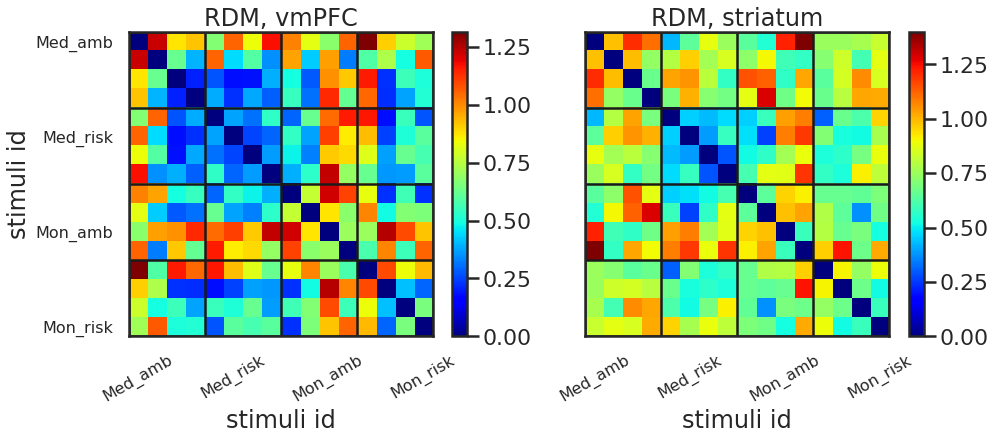

In [108]:
stim_cat = ['', 'Med_amb', 'Med_risk', 'Mon_amb', 'Mon_risk']
fontdict = {'fontsize': 16}
edges = np.array([0,4,8,12,16])-0.5

f, ax = plt.subplots(1,2, figsize=(15, 7))
im0 = ax[0].imshow(rdm_vmpfc, cmap = 'jet')
ax[0].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[0].set_yticklabels(stim_cat, fontdict = fontdict)
ax[0].set_title('RDM, vmPFC') 
ax[0].set_xlabel('stimuli id')
ax[0].set_ylabel('stimuli id')
ax[0].vlines(edges,min(edges),max(edges))
ax[0].hlines(edges,min(edges),max(edges))
f.colorbar(im0, ax=ax[0], shrink = 0.8)


im1 = ax[1].imshow(rdm_striatum, cmap = 'jet')
f.colorbar(im1, ax=ax[1], shrink = 0.8)
ax[1].set_title('RDM, striatum') 
ax[1].set_xlabel('stimuli id')
ax[1].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[1].set_yticklabels('')
ax[1].vlines(edges,min(edges),max(edges))
ax[1].hlines(edges,min(edges),max(edges))

f.subplots_adjust()

In [109]:
stims = {'01': 'Med_amb_0', '02': 'Med_amb_1', '03': 'Med_amb_2', '04': 'Med_amb_3',
         '05': 'Med_risk_0', '06': 'Med_risk_1', '07': 'Med_risk_2', '08': 'Med_risk_3', 
         '09': 'Mon_amb_0', '10': 'Mon_amb_1', '11': 'Mon_amb_2', '12': 'Mon_amb_3',
         '13': 'Mon_risk_0', '14': 'Mon_risk_1', '15': 'Mon_risk_2', '16': 'Mon_risk_3'}


stim_num = len(stims)

cont_allstims_vmpfc= np.zeros((stim_num, 449))
cont_allstims_striatum= np.zeros((stim_num, 500))


for (stim_idx, stim) in enumerate(list(stims.keys())):
    cont = nib.load(os.path.join(data_root, '_subject_id_2588', 'spmT_00%s.nii' %stim))
    cont_vmpfc = masker_vmpfc.fit_transform(cont)
    cont_striatum = masker_striatum.fit_transform(cont)
    
    cont_allstims_vmpfc[stim_idx, :] = cont_vmpfc
    cont_allstims_striatum[stim_idx, :] = cont_striatum

In [110]:
# create rdm
rdm_vmpfc = 1 - np.corrcoef(cont_allstims_vmpfc)
rsm_vmpfc = np.corrcoef(cont_allstims_vmpfc)
rdm_striatum = 1 - np.corrcoef(cont_allstims_striatum)
rsm_striatum = np.corrcoef(cont_allstims_striatum)

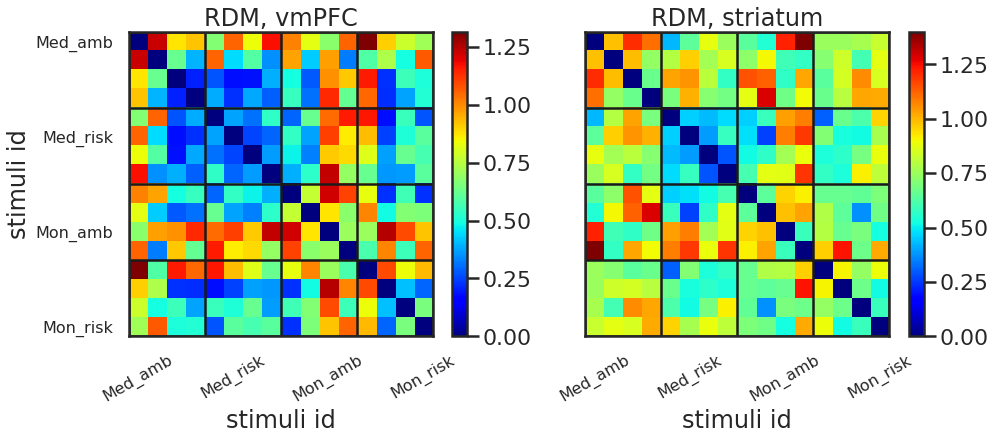

In [111]:
stim_cat = ['', 'Med_amb', 'Med_risk', 'Mon_amb', 'Mon_risk']
fontdict = {'fontsize': 16}
edges = np.array([0,4,8,12,16])-0.5

f, ax = plt.subplots(1,2, figsize=(15, 7))
im0 = ax[0].imshow(rdm_vmpfc, cmap = 'jet')
ax[0].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[0].set_yticklabels(stim_cat, fontdict = fontdict)
ax[0].set_title('RDM, vmPFC') 
ax[0].set_xlabel('stimuli id')
ax[0].set_ylabel('stimuli id')
ax[0].vlines(edges,min(edges),max(edges))
ax[0].hlines(edges,min(edges),max(edges))
f.colorbar(im0, ax=ax[0], shrink = 0.8)


im1 = ax[1].imshow(rdm_striatum, cmap = 'jet')
f.colorbar(im1, ax=ax[1], shrink = 0.8)
ax[1].set_title('RDM, striatum') 
ax[1].set_xlabel('stimuli id')
ax[1].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[1].set_yticklabels('')
ax[1].vlines(edges,min(edges),max(edges))
ax[1].hlines(edges,min(edges),max(edges))

f.subplots_adjust()

## Load workflow outpu of matrix

In [7]:
# get subject average rdm
subjects = [2582, 2588, 2600]
roi_rdm_0 = []
roi_rdm_1 = []

for sub in subjects:
    roi_rdm_sub_obj = np.load('/home/rj299/project/mdm_analysis/output/imaging/Sink_rsa/rdm/_subject_id_%s/roi_rdm.npy' %sub,
       allow_pickle = True)
    
    roi_rdm_sub = roi_rdm_sub_obj.item()
    roi_names = list(roi_rdm.keys())
    
    roi_rdm_0.append(roi_rdm_sub[roi_names[0]])
    roi_rdm_1.append(roi_rdm_sub[roi_names[1]])
    
roi_rdm = {roi_names[0]: roi_rdm_0, roi_names[1]: roi_rdm_1}    

In [18]:
np.mean(roi_rdm['vmpfc'], axis = 0).shape

(16, 16)

In [4]:
roi_rdm_obj = np.load('/home/rj299/project/mdm_analysis/output/imaging/Sink_rsa/rdm/_subject_id_2582/roi_rdm.npy',
       allow_pickle = True)

In [5]:
roi_rdm = roi_rdm_obj.item()

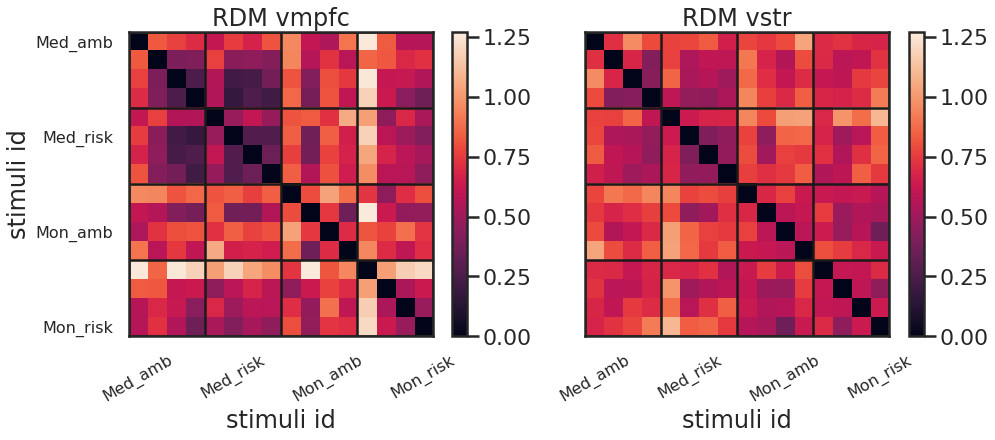

In [40]:
stim_cat = ['', 'Med_amb', 'Med_risk', 'Mon_amb', 'Mon_risk']
fontdict = {'fontsize': 16}
edges = np.array([0,4,8,12,16])-0.5
roi_names = list(roi_rdm.keys())

f, ax = plt.subplots(1,2, figsize=(15, 7))
im0 = ax[0].imshow(np.mean(roi_rdm[roi_names[0]], axis=0), vmax = 1.27)
ax[0].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[0].set_yticklabels(stim_cat, fontdict = fontdict)
ax[0].set_title('RDM '+roi_names[0]) 
ax[0].set_xlabel('stimuli id')
ax[0].set_ylabel('stimuli id')
ax[0].vlines(edges,min(edges),max(edges))
ax[0].hlines(edges,min(edges),max(edges))
f.colorbar(im0, ax=ax[0], shrink = 0.8)


im1 = ax[1].imshow(np.mean(roi_rdm[roi_names[1]], axis=0), vmax = 1.27)
f.colorbar(im1, ax=ax[1], shrink = 0.8)
ax[1].set_title('RDM '+roi_names[1]) 
ax[1].set_xlabel('stimuli id')
ax[1].set_xticklabels(stim_cat, rotation = 30, fontdict = fontdict)
ax[1].set_yticklabels('')
ax[1].vlines(edges,min(edges),max(edges))
ax[1].hlines(edges,min(edges),max(edges))

f.subplots_adjust()